In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
RawData = pd.read_csv('data/credit_card_fraud_dataset.csv', index_col=0)
print(RawData.info())
RawData['TransactionDate'] = pd.to_datetime(RawData['TransactionDate'])
print(RawData.describe())
RawData

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionDate  100000 non-null  object 
 1   Amount           100000 non-null  float64
 2   MerchantID       100000 non-null  int64  
 3   TransactionType  100000 non-null  object 
 4   Location         100000 non-null  object 
 5   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 5.3+ MB
None
                     TransactionDate         Amount     MerchantID  \
count                         100000  100000.000000  100000.000000   
mean   2024-04-21 13:06:09.973745920    2497.092666     501.676070   
min       2023-10-21 09:28:35.824439       1.050000       1.000000   
25%    2024-01-20 23:18:20.586056704    1247.955000     252.000000   
50%    2024-04-21 13:39:35.701438976    2496.500000     503.000000   
75%    2024-07-21 22:28:05.70262

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
TransactionID,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0


<Figure size 640x480 with 0 Axes>

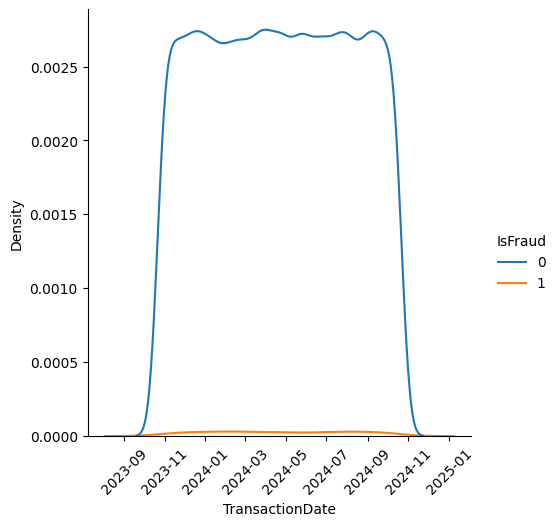

<Figure size 640x480 with 0 Axes>

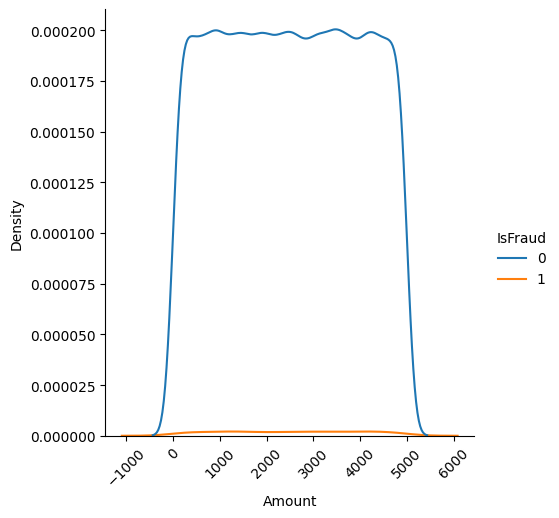

<Figure size 640x480 with 0 Axes>

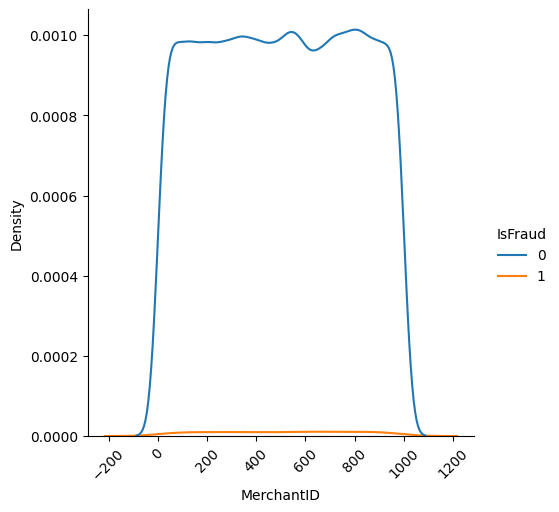

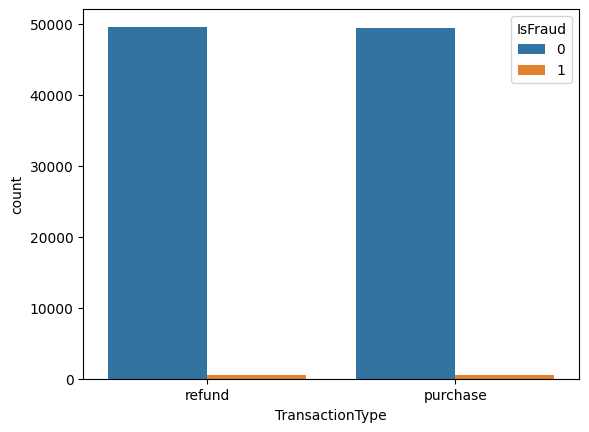

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'San Antonio'),
  Text(1, 0, 'Dallas'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Philadelphia'),
  Text(4, 0, 'Phoenix'),
  Text(5, 0, 'Chicago'),
  Text(6, 0, 'San Jose'),
  Text(7, 0, 'San Diego'),
  Text(8, 0, 'Houston'),
  Text(9, 0, 'Los Angeles')])

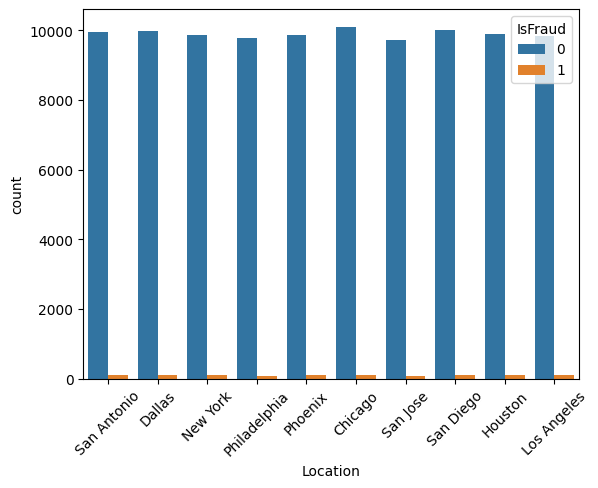

In [36]:
# Plot the distribution of the data
for col in RawData.columns:
    if col not in ['TransactionType', 'IsFraud', 'Location']:
        plt.figure()
        sns.displot(data=RawData, x=col, hue='IsFraud', kind='kde')
        plt.xticks(rotation=45)
        plt.show()

plt.figure()
sns.countplot(data=RawData, x='TransactionType', hue='IsFraud')
plt.show()

plt.figure()
sns.countplot(data=RawData, x='Location', hue='IsFraud')
plt.xticks(rotation=45)

In [ ]:
# Data is unbalanced, we need to balance it
bool1 = (RawData['IsFraud'] == 1)
bool2 = (RawData[RawData['IsFraud'] == 0].sample(sum(bool1)).index) # 1 times the number of frauds

BalancedData = pd.concat([RawData[bool1], RawData.loc[bool2]])
BalancedData = BalancedData.sample(frac=1, random_state=42).reset_index(drop=True)
print(BalancedData.info())
BalancedData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionDate  2000 non-null   datetime64[ns]
 1   Amount           2000 non-null   float64       
 2   MerchantID       2000 non-null   int64         
 3   TransactionType  2000 non-null   object        
 4   Location         2000 non-null   object        
 5   IsFraud          2000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 93.9+ KB
None


,TransactionDate,Amount,MerchantID,IsFraud
count,2000,2000.00000,2000.00000,2000.000000
mean,2024-04-21 04:45:30.558716672,2508.32740,498.01750,0.500000
min,2023-10-21 10:50:35.589106,1.91000,1.00000,0.000000
25%,2024-01-19 17:22:35.873738752,1232.67500,247.75000,0.000000
50%,2024-04-15 14:19:05.705236992,2518.60000,496.50000,0.500000
75%,2024-07-25 06:54:50.913608192,3803.30750,747.00000,1.000000
max,2024-10-21 07:40:35.962369,4992.99000,1000.00000,1.000000
std,NaN,1454.27064,287.94495,0.500125


<Figure size 640x480 with 0 Axes>

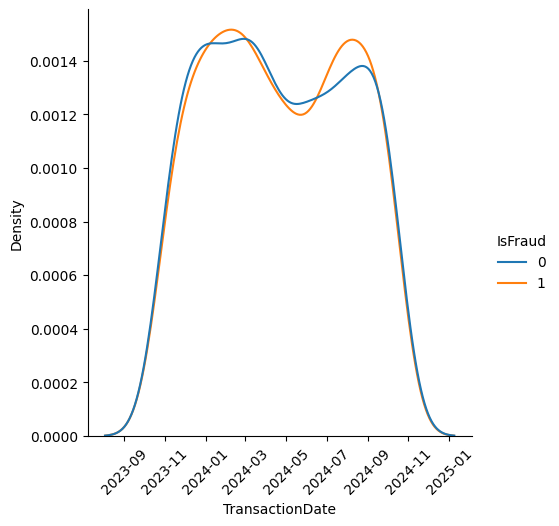

<Figure size 640x480 with 0 Axes>

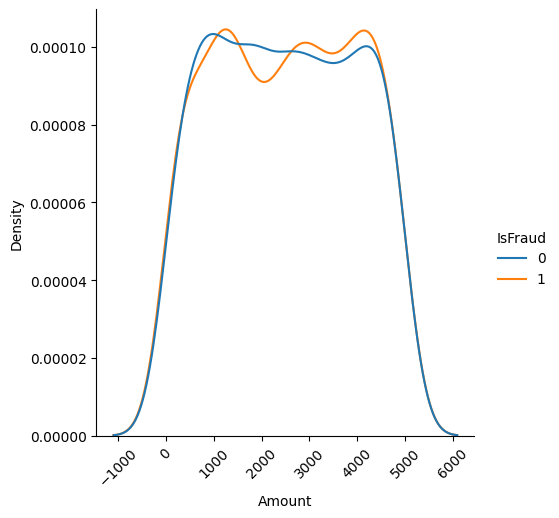

<Figure size 640x480 with 0 Axes>

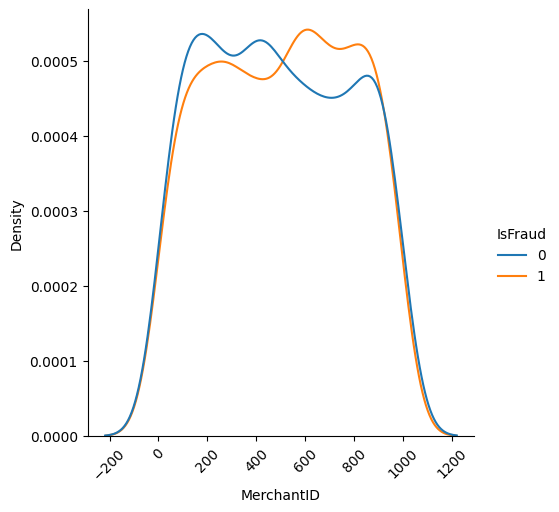

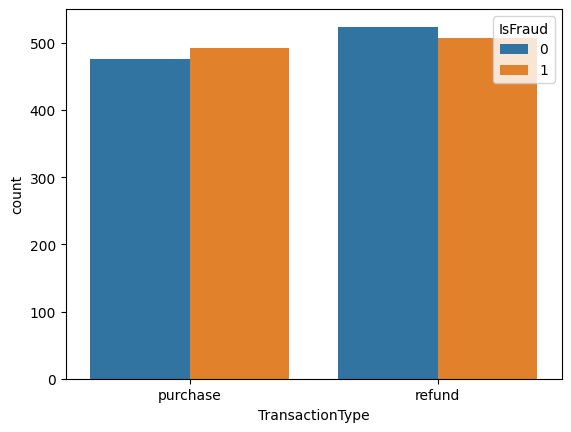

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'San Jose'),
  Text(1, 0, 'San Antonio'),
  Text(2, 0, 'San Diego'),
  Text(3, 0, 'New York'),
  Text(4, 0, 'Dallas'),
  Text(5, 0, 'Philadelphia'),
  Text(6, 0, 'Los Angeles'),
  Text(7, 0, 'Chicago'),
  Text(8, 0, 'Phoenix'),
  Text(9, 0, 'Houston')])

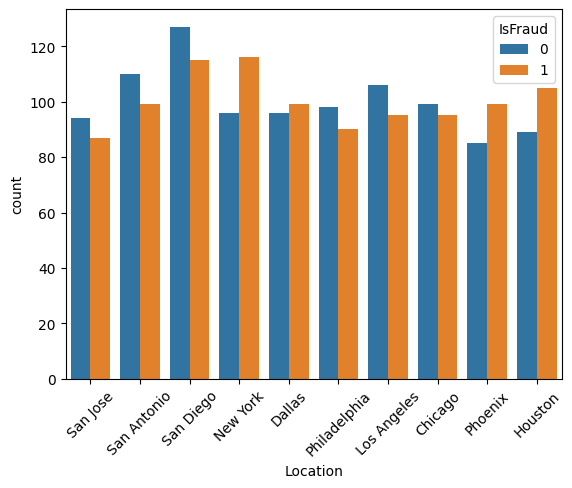

In [42]:
# Plot the distribution of the data
for col in RawData.columns:
    if col not in ['TransactionType', 'IsFraud', 'Location']:
        plt.figure()
        sns.displot(data=BalancedData, x=col , hue='IsFraud', kind='kde')
        plt.xticks(rotation=45)
        plt.show()

plt.figure()
sns.countplot(data=BalancedData, x='TransactionType', hue='IsFraud')
plt.show()

plt.figure()
sns.countplot(data=BalancedData, x='Location', hue='IsFraud')
plt.xticks(rotation=45)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Convert object columns to numeric
label_encoders = {}
for column in BalancedData.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    BalancedData[column] = le.fit_transform(BalancedData[column])
    label_encoders[column] = le# Convert TransactionDate to timestamp


# Split the data into training and test sets (4:1 ratio)
X = BalancedData.drop(columns=['IsFraud'])
X['TransactionDate'] = X['TransactionDate'].astype('int64') // 10**9
y = BalancedData['IsFraud']
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model with balanced class weights
model = RandomForestClassifier(random_state=87)
model.fit(X_train, y_train)

model

   TransactionDate   Amount  MerchantID  TransactionType  Location
0       1701296555  4962.46         520                0         9
1       1728645575  1925.33         566                0         7
2       1714862015  4611.04         127                1         9
3       1724450915  3850.36          32                1         8
4       1707688055  4569.02          53                0         4


RandomForestClassifier(random_state=87)

C:\Users\guill\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
397 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\guill\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\guill\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\guill\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

Mejores parámetros encontrados: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       203
           1       0.50      0.51      0.51       197

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400

AUC: 0.4980120527118601


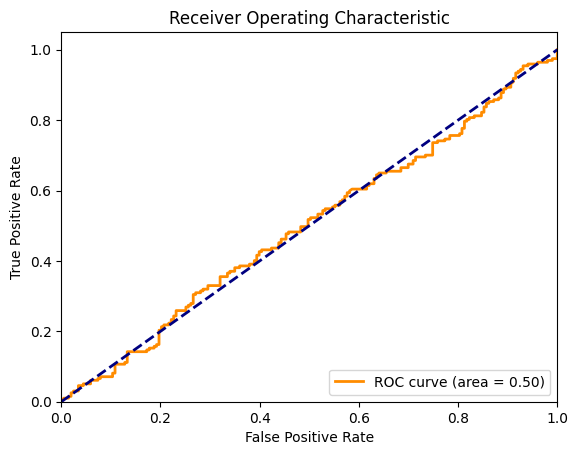

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = RandomForestClassifier(random_state=87, class_weight='balanced')

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo con los mejores parámetros
best_model = RandomForestClassifier(**best_params, random_state=87, class_weight='balanced')
best_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Calcular AUC
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {roc_auc}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()